
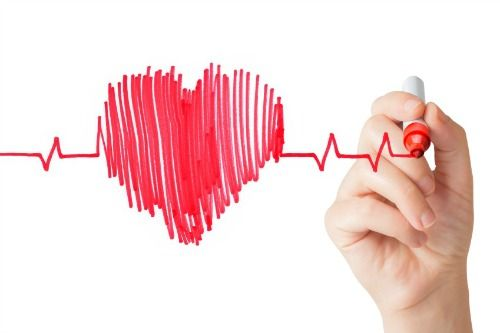


## Nowadays, Heart Diseases in humans are the most common. One of them, which is Heart Attack is believed to be a peaceful death, too! These diseases are so common in humans, that for people older than 75, congestive heart failure occurs 10 times more often than in younger adults.

## How helpful it would have been, if one could predict a patient would be suffering from Heart Disease or not, or whether he/she may fall for such a situation in future or not.

## Below I've aaplied Logistic Regression, Gaussian Naive Bayesian and K - Nearest Algorithm on the dataset!

## Do Upvote 🙌 my kernel if found useful!


### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Loading the dataset

In [2]:
df = pd.read_csv("../input/heart-dataset/heart_info.csv")

### Dimensions of dataset

In [3]:
df.shape

(303, 14)

### Features of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Explanation of 14 features
- **age:** age in years
- **sex:** (1 = male; 0 = female)
- **cp:** chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
- **trestbps:** resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
- **chol:** serum cholesterol in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
- **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
- **restecg:** resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
- **thalach:** maximum heart rate achieved
- **exang:** exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
- **slope:** the slope of the peak exercise ST segment
    -0: Upsloping: better heart rate with exercise (uncommon)
    -1: Flat Sloping: minimal change (typical healthy heart)
    -2: Downsloping: signs of unhealthy heart
- **ca:** number of major vessels (0-3) colored by fluoroscopy
    -colored vessel means the doctor can see the blood passing through
    -the more blood movement the better (no clots)
- **thal:** 3 = normal; 6 = fixed defect; 7 = reversible defect
    -1,3: normal
    -6: fixed defect: used to be defect but ok now
    -7: reversible defect: no proper blood movement when exercising
- **target:** have disease or not (1=yes, 0=no) (= the predicted attribute)

### Viewing dataset

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Conversion for Visualizing Data

In [6]:
#for target
conversion_dict = {1 : 'isHeartPatient', 0 : 'isNotHeartPatient'}
df['target'] = df['target'].replace(conversion_dict)
#for sex
conversion_dict = {1 : 'Male', 0 : 'Female'}
df['sex'] = df['sex'].replace(conversion_dict)
#for cp
conversion_dict = {0 : 'Typical', 1 : 'Atypical', 2 : 'Non-anginal', 3 : 'Asymptomatic'}
df['cp'] = df['cp'].replace(conversion_dict)
#for fbs
conversion_dict = {1 : 'fbs > 120 mg/dl', 0 : 'fbs < 120 mg/dl'}
df['fbs'] = df['fbs'].replace(conversion_dict)
#for exang
conversion_dict = {1 : 'induced angina', 0 : 'not induced angina'}
df['exang'] = df['exang'].replace(conversion_dict)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,145,233,fbs > 120 mg/dl,0,150,not induced angina,2.3,0,0,1,isHeartPatient
1,37,Male,Non-anginal,130,250,fbs < 120 mg/dl,1,187,not induced angina,3.5,0,0,2,isHeartPatient
2,41,Female,Atypical,130,204,fbs < 120 mg/dl,0,172,not induced angina,1.4,2,0,2,isHeartPatient
3,56,Male,Atypical,120,236,fbs < 120 mg/dl,1,178,not induced angina,0.8,2,0,2,isHeartPatient
4,57,Female,Typical,120,354,fbs < 120 mg/dl,1,163,induced angina,0.6,2,0,2,isHeartPatient


### Checking for null values in the dataset

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Checking features of various attributes

#### 1. Sex (1 : Male , 0 : Female) vs Heart Disease Patients

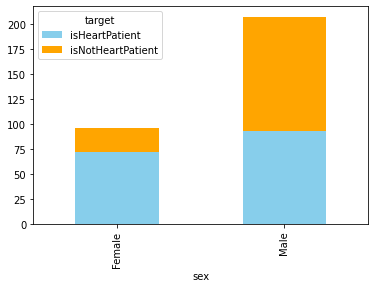

In [8]:
df_plot = df.groupby(['target', 'sex']).size().reset_index().pivot(columns='target', index='sex', values=0)
df_plot.plot(kind='bar', stacked=True, color=['skyblue','orange'])

#### 2. Chest Pain Type vs Heart Disease Patients

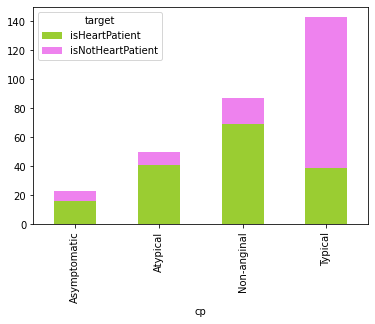

In [9]:
df_plot = df.groupby(['target', 'cp']).size().reset_index().pivot(columns='target', index='cp', values=0)
df_plot.plot(kind='bar', stacked=True, color=['yellowgreen','violet'])

#### 3. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) vs Heart Disease Patients

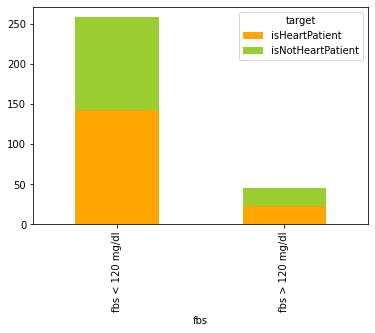

In [10]:
df_plot = df.groupby(['target', 'fbs']).size().reset_index().pivot(columns='target', index='fbs', values=0)
df_plot.plot(kind='bar', stacked=True, color=['orange', 'yellowgreen'])

#### 4. exang: exercise induced angina (1 = yes; 0 = no) vs Heart Disease Patients

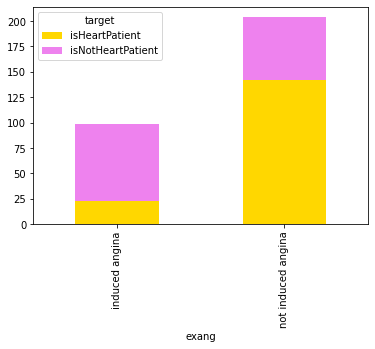

In [11]:
df_plot = df.groupby(['target', 'exang']).size().reset_index().pivot(columns='target', index='exang', values=0)
df_plot.plot(kind='bar', stacked=True, color=['gold', 'violet'])

### Plotting the distribution of various attributes

#### 1. thalach: maximum heart rate achieved

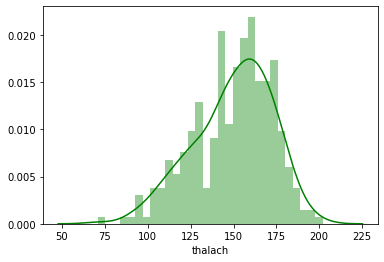

In [12]:
sns.distplot(df['thalach'],kde=True,bins=30,color='green')

#### 2. chol: serum cholestoral in mg/dl 

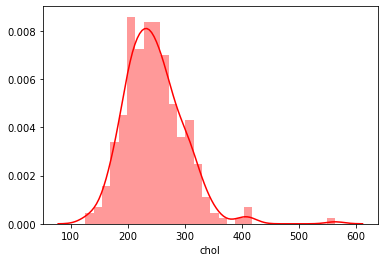

In [13]:
sns.distplot(df['chol'],kde=True,bins=30,color='red')

#### 3. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

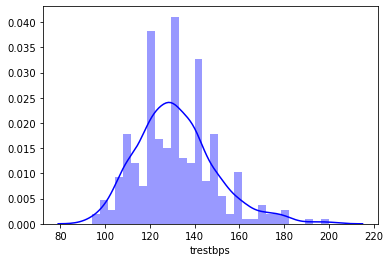

In [14]:
sns.distplot(df['trestbps'],kde=True,bins=30,color='blue')

#### 4. Number of people who have heart disease according to age 

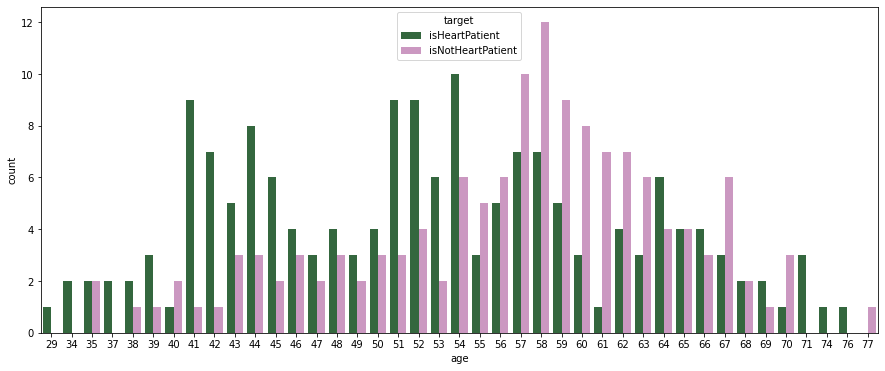

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='cubehelix')

### Reverting back to numeric values for predictions

In [16]:
#for target
conversion_dict = {'isHeartPatient' : 1, 'isNotHeartPatient' : 0}
df['target'] = df['target'].replace(conversion_dict)
#for sex
conversion_dict = {'Male' : 1,'Female' : 0}
df['sex'] = df['sex'].replace(conversion_dict)
#for cp
conversion_dict = {'Typical' : 0,'Atypical' : 1,'Non-anginal' : 2,'Asymptomatic' : 3}
df['cp'] = df['cp'].replace(conversion_dict)
#for fbs
conversion_dict = {'fbs > 120 mg/dl' : 1, 'fbs < 120 mg/dl' : 0}
df['fbs'] = df['fbs'].replace(conversion_dict)
#for exang
conversion_dict = {'induced angina' : 1,'not induced angina' : 0}
df['exang'] = df['exang'].replace(conversion_dict)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Splitting the dataset into train and test set for making predictions

In [17]:
x = df.drop('target',axis=1)
y = df['target']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42) 

### Preprocessing - Scaling the features

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Importing important modules from above imported libraries

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

### Applying Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logreg = LogisticRegression()

In [23]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [24]:
begin = time.time()
y_pred = logreg.predict(x_test)
end = time.time()
lrExecTime = end - begin
print('Execution Time taken by LR : ',lrExecTime)

Execution Time taken by LR :  0.0005600452423095703


In [25]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### Printing Confusion Matrix

In [26]:
print(confusion_matrix(y_test, y_pred))

[[25  4]
 [ 5 27]]


### Printing Classification Matrix

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Printing Accuracy Score

In [28]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
lrAccuracy = round(accuracy_score(y_test,y_pred),5)*100
print('Using Logistic Regression we get an accuracy score of: ',
      lrAccuracy,'%')

Accuracy:  0.8524590163934426
Accuracy Score:  0.8524590163934426
Using Logistic Regression we get an accuracy score of:  85.246 %


### Applying Gaussian Naive Bayesian

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
gnb = GaussianNB()

In [31]:
gnb.fit(x_train, y_train)

GaussianNB()

In [32]:
begin = time.time()
y_pred = gnb.predict(x_test)
end = time.time()
gnbExecTime = end - begin
print('Execution Time taken by GNB : ',gnbExecTime)

Execution Time taken by GNB :  0.0007791519165039062


In [33]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### Printing Confusion Matrix

In [34]:
print(confusion_matrix(y_test, y_pred))

[[26  3]
 [ 5 27]]


### Printing Classification Matrix

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Printing Accuracy Score

In [36]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
gnbAccuracy = round(accuracy_score(y_test,y_pred),5)*100
print('Using Gaussian Naive Bayesian we get an accuracy score of: ',
      gnbAccuracy,'%')

Accuracy:  0.8688524590163934
Accuracy Score:  0.8688524590163934
Using Gaussian Naive Bayesian we get an accuracy score of:  86.885 %


###  Applying K Nearest Neighors Algorithm

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
classifier = KNeighborsClassifier(n_neighbors=7)

In [39]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

### Making predictions

In [40]:
begin = time.time()
y_pred = classifier.predict(x_test)
end = time.time()
knnExecTime = end - begin
print('Execution Time taken by KNN : ',knnExecTime)

Execution Time taken by KNN :  0.005665302276611328


In [41]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### Printing Confusion Matrix

In [42]:
print(confusion_matrix(y_test, y_pred))

[[27  2]
 [ 3 29]]


### Printing Classification Matrix

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



### Printing Accuracy Score

In [44]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
knnAccuracy = round(accuracy_score(y_test,y_pred),5)*100
print('Using k-NN we get an accuracy score of: ',
      knnAccuracy,'%')

Accuracy Score:  0.9180327868852459
Using k-NN we get an accuracy score of:  91.803 %


### Execution Time : Logistic Regression vs Gaussian Naive Bayesian vs KNN Algorithm

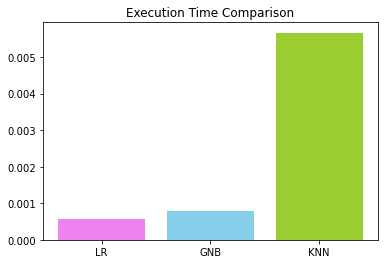

In [45]:
labels = 'LR','GNB','KNN'
values = [lrExecTime,gnbExecTime,knnExecTime]
plt.bar(labels,values,color=['violet','skyblue','yellowgreen'])
plt.title('Execution Time Comparison')
plt.show()

### Accuracy : Logistic Regression vs Gaussian Naive Bayesian vs KNN Algorithm

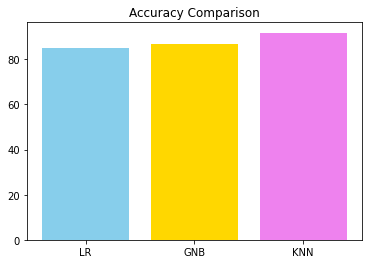

In [46]:
labels = 'LR','GNB','KNN'
values = [lrAccuracy,gnbAccuracy,knnAccuracy]
plt.bar(labels,values,color=['skyblue','gold','violet'])
plt.title('Accuracy Comparison')
plt.show()